<a href="https://colab.research.google.com/github/varunveda/delivery_time_analysis/blob/main/Delivery_Time_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Importing the dataset
df=pd.read_csv('/content/DataCoSupplyChainDataset.csv',encoding='latin1')

Data Cleaning

In [ ]:
# Data Cleaning
# Remove rows with missing values in the relevant columns
df = df.dropna(subset=['Days for shipping (real)', 'Days for shipment (scheduled)'])

<ipython-input-7-8ebf6526f51a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


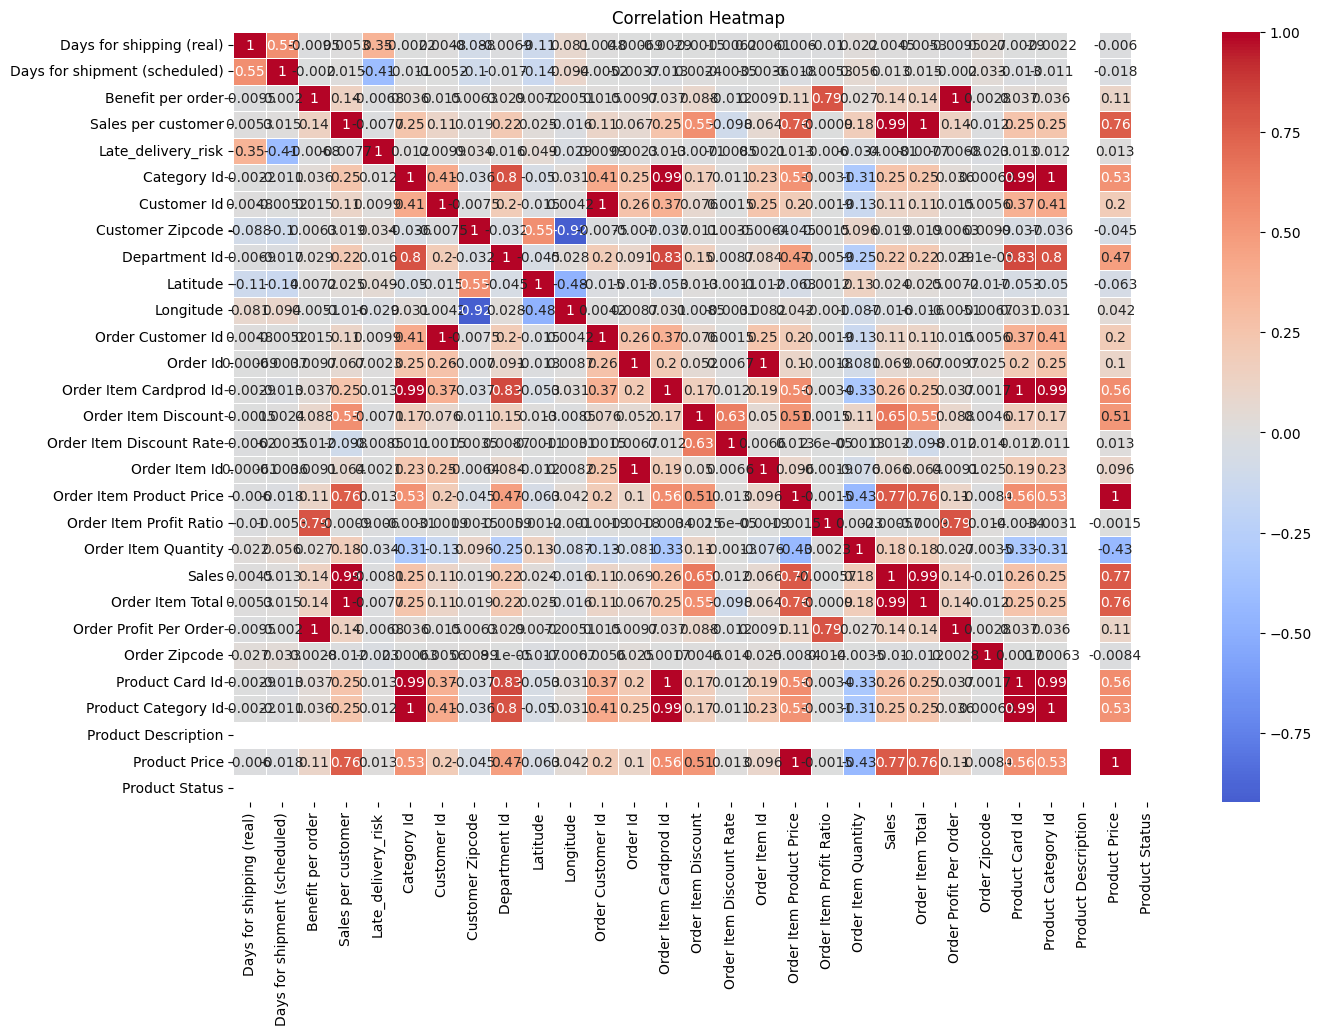

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(15, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Set the title
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

In [ ]:
# Compute the delivery time discrepancy
df['delivery_time_difference'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']

In [ ]:
# Compute basic statistics
real_shipping_stats = df['Days for shipping (real)'].describe()
scheduled_shipping_stats = df['Days for shipment (scheduled)'].describe()
time_difference_stats = df['delivery_time_difference'].describe()

print("Real Shipping Days Statistics:")
print(real_shipping_stats)
print("\nScheduled Shipping Days Statistics:")
print(scheduled_shipping_stats)
print("\nDifference between expected vs real delivery time Statistics:")
print(time_difference_stats)

Real Shipping Days Statistics:
count    13920.000000
mean         3.702586
std          1.532105
min          0.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: Days for shipping (real), dtype: float64

Scheduled Shipping Days Statistics:
count    13920.000000
mean         3.161063
std          1.211130
min          0.000000
25%          2.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: Days for shipment (scheduled), dtype: float64

Difference between expected vs real delivery time Statistics:
count    13920.000000
mean         0.541523
std          1.562456
min         -2.000000
25%         -1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: delivery_time_difference, dtype: float64


Text(0.5, 1.0, 'Distribution of Real Shipping Days')

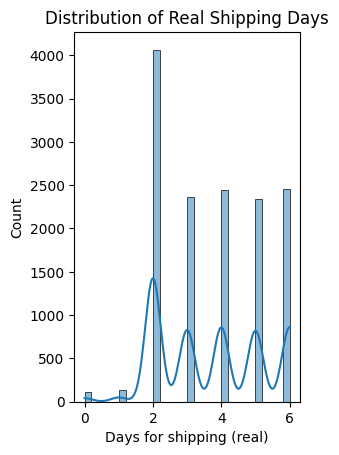

In [ ]:
# Real shipping days distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Days for shipping (real)'], kde=True, bins=30)
plt.title("Distribution of Real Shipping Days")

Text(0.5, 1.0, 'Distribution of Scheduled Shipping Days')

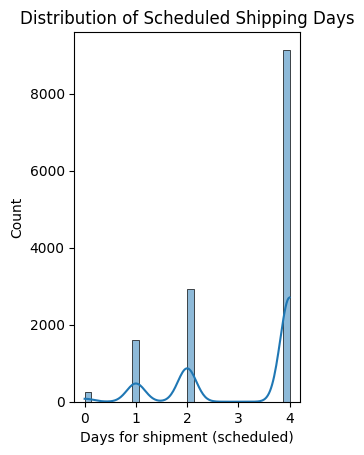

In [ ]:
# Scheduled shipping days distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Days for shipment (scheduled)'], kde=True, bins=30)
plt.title("Distribution of Scheduled Shipping Days")

In [ ]:
# Checking the total number of null values in the dataframe
df.isna().sum()

Type                                 0
Days for shipping (real)             0
Days for shipment (scheduled)        0
Benefit per order                    0
Sales per customer                   0
Delivery Status                      0
Late_delivery_risk                   0
Category Id                          0
Category Name                        0
Customer City                        0
Customer Country                     0
Customer Email                       0
Customer Fname                       0
Customer Id                          0
Customer Lname                       0
Customer Password                    0
Customer Segment                     1
Customer State                       1
Customer Street                      1
Customer Zipcode                     1
Department Id                        1
Department Name                      1
Latitude                             1
Longitude                            1
Market                               1
Order City               

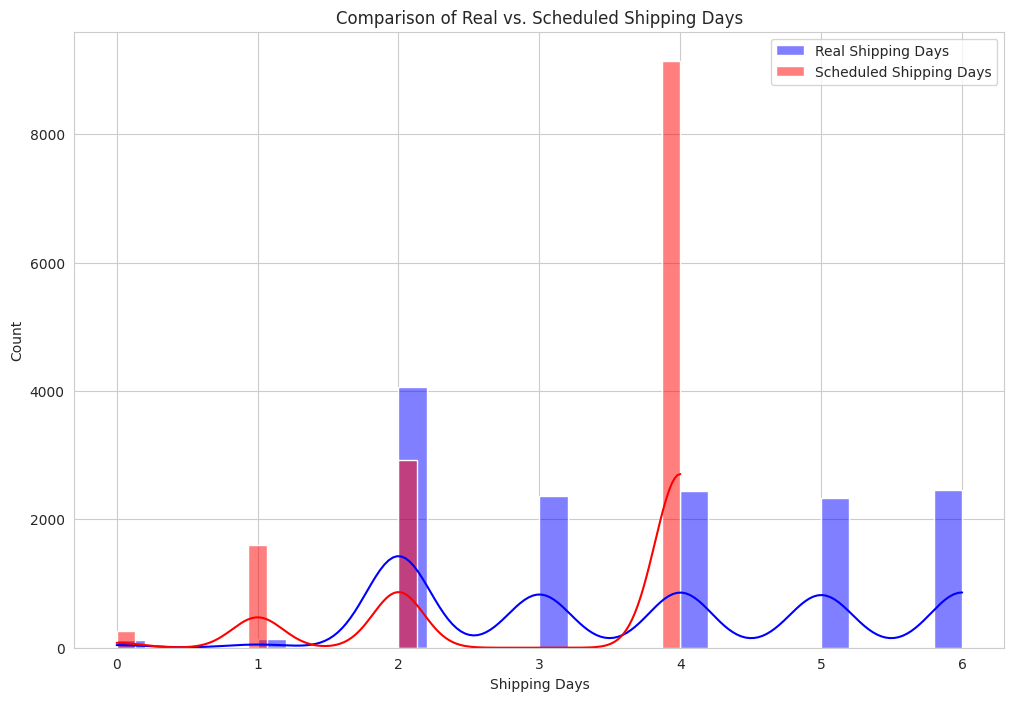

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Days for shipping (real)'], color='blue', label='Real Shipping Days', kde=True, bins=30)
sns.histplot(df['Days for shipment (scheduled)'], color='red', label='Scheduled Shipping Days', kde=True, bins=30)
plt.legend()
plt.xlabel("Shipping Days")
plt.title("Comparison of Real vs. Scheduled Shipping Days")
plt.show()


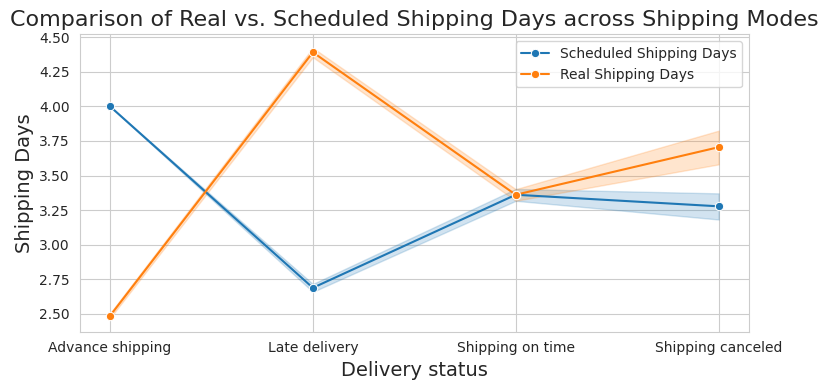

In [ ]:

# Set the figure size and style
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")

# Plot Days for shipment (scheduled)
sns.lineplot(x='Delivery Status', y='Days for shipment (scheduled)', data=df, marker='o', label='Scheduled Shipping Days')

# Plot Days for shipping (real)
sns.lineplot(x='Delivery Status', y='Days for shipping (real)', data=df, marker='o', label='Real Shipping Days')

# Titles, labels and legend
plt.title("Comparison of Real vs. Scheduled Shipping Days across Shipping Modes", fontsize=16)
plt.xlabel("Delivery status", fontsize=14)
plt.ylabel("Shipping Days", fontsize=14)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# Convert 'Shipping date (DateOrders)' to datetime format
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

# Extract the year
df['Year'] = df['shipping date (DateOrders)'].dt.year

# Group by the extracted year and count the number of orders
yearly_orders = df.groupby('Year').size().reset_index(name='Number of Orders')

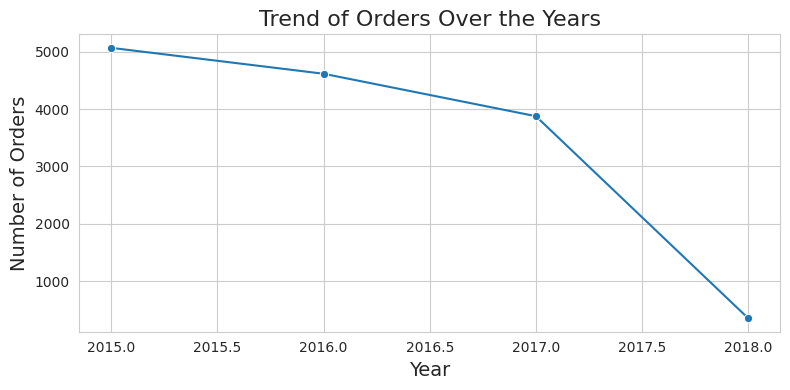

In [ ]:
# Plot
plt.figure(figsize=(8, 4))
sns.lineplot(x='Year', y='Number of Orders', data=yearly_orders, marker='o')

plt.title("Trend of Orders Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Orders", fontsize=14)
plt.tight_layout()
plt.show()

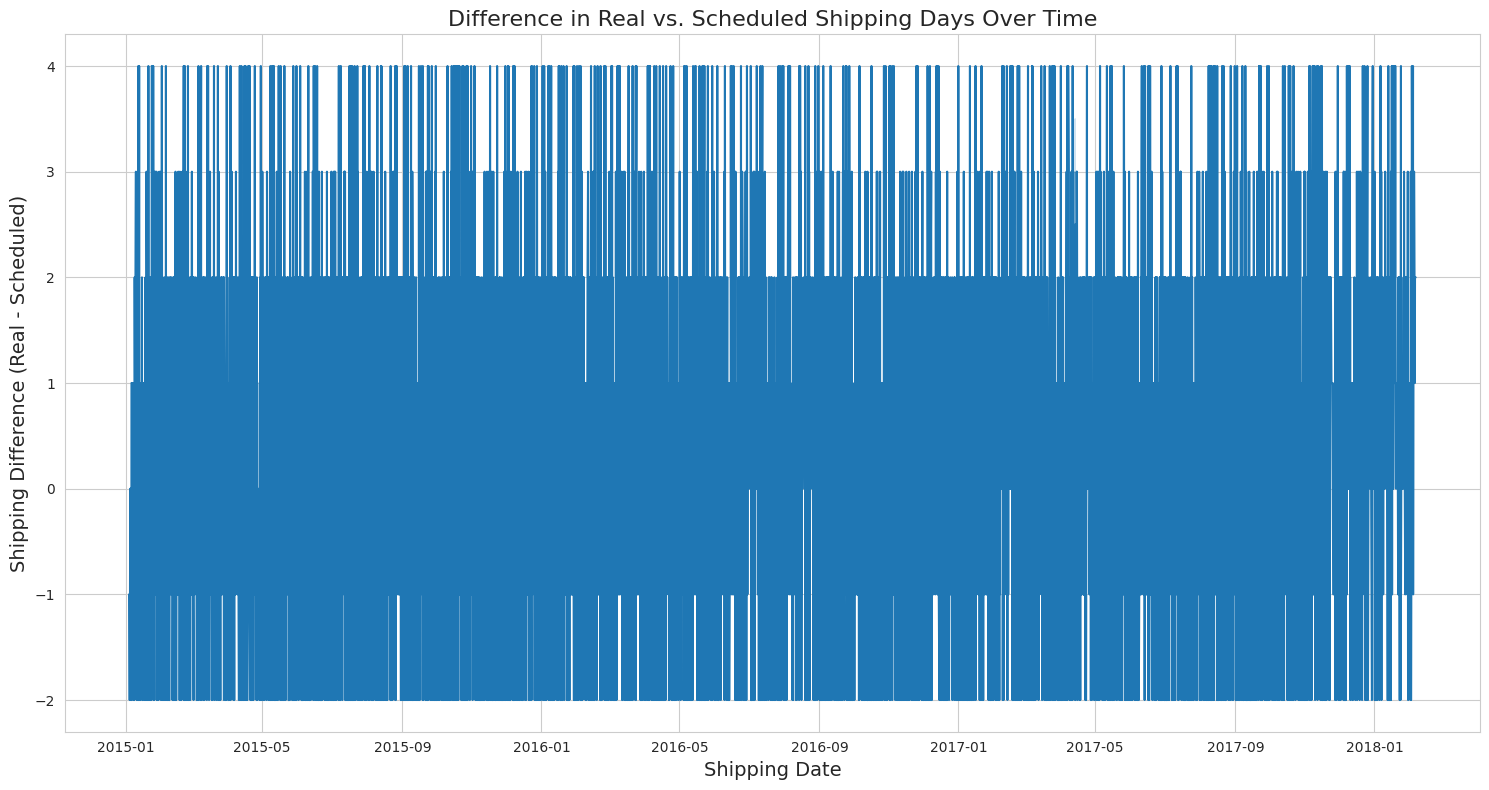

In [ ]:

# Create a new column for the difference
df['Shipping Difference'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']

# Plotting
plt.figure(figsize=(15, 8))

# Plot the difference over time
sns.lineplot(x=df['shipping date (DateOrders)'], y=df['Shipping Difference'])

plt.title("Difference in Real vs. Scheduled Shipping Days Over Time", fontsize=16)
plt.xlabel("Shipping Date", fontsize=14)
plt.ylabel("Shipping Difference (Real - Scheduled)", fontsize=14)
plt.tight_layout()

plt.show()


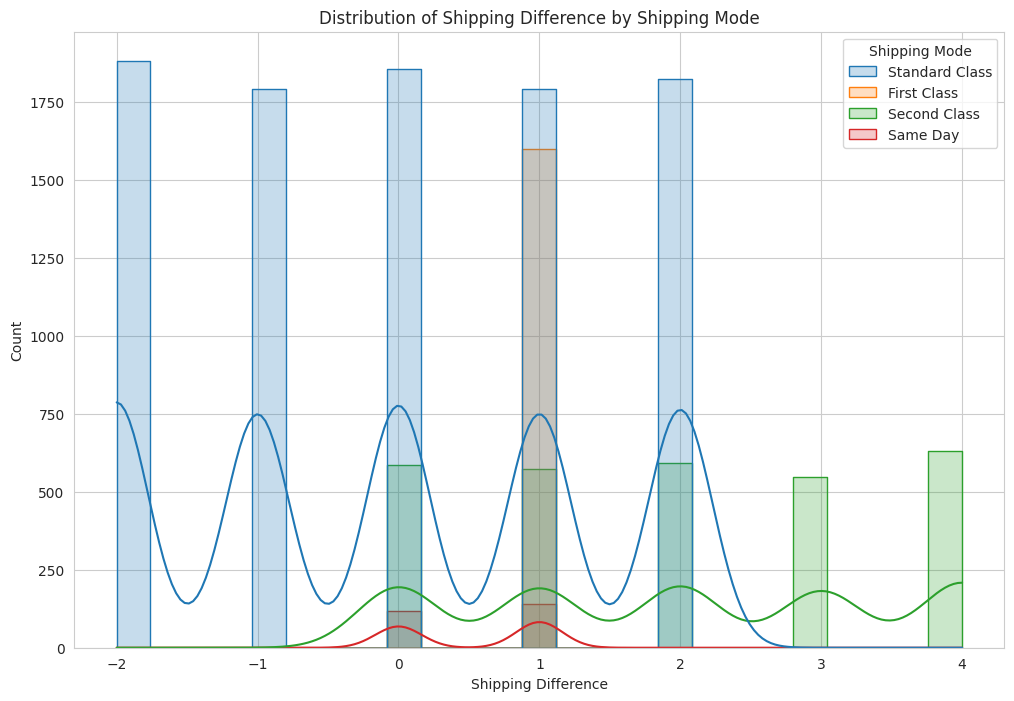

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Shipping Difference', kde=True, hue='Shipping Mode', element='step')
plt.title("Distribution of Shipping Difference by Shipping Mode")
plt.show()

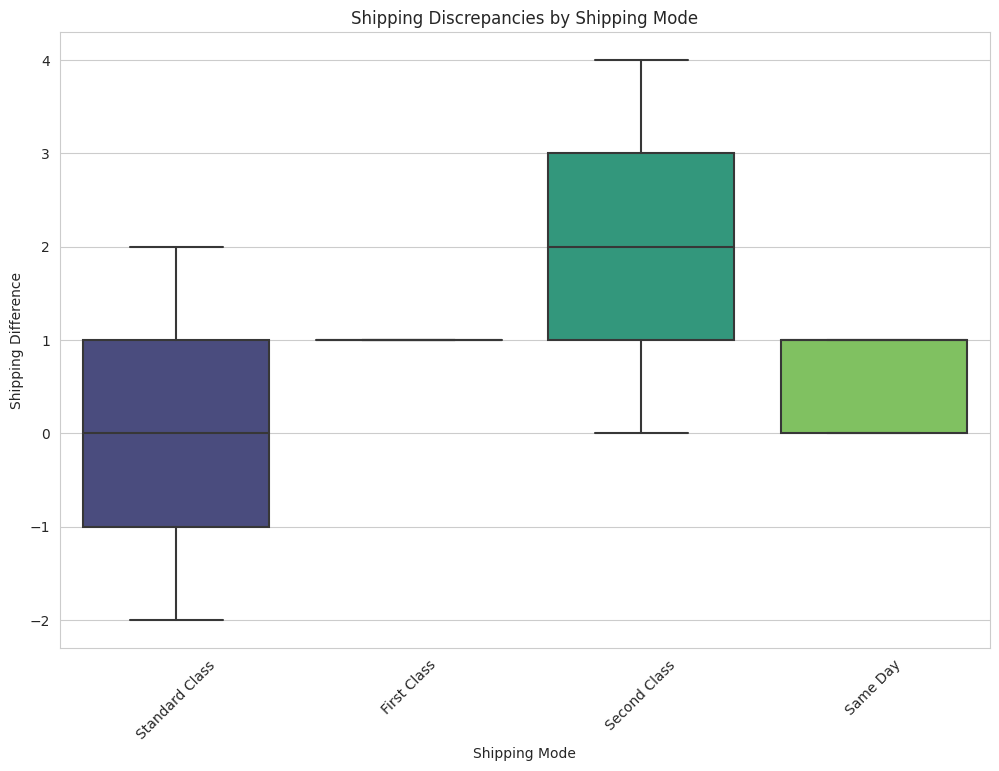

In [ ]:
# Discrepancies by Shipping Mode
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Shipping Mode', y='Shipping Difference', palette='viridis')
plt.title("Shipping Discrepancies by Shipping Mode")
plt.xticks(rotation=45)
plt.show()

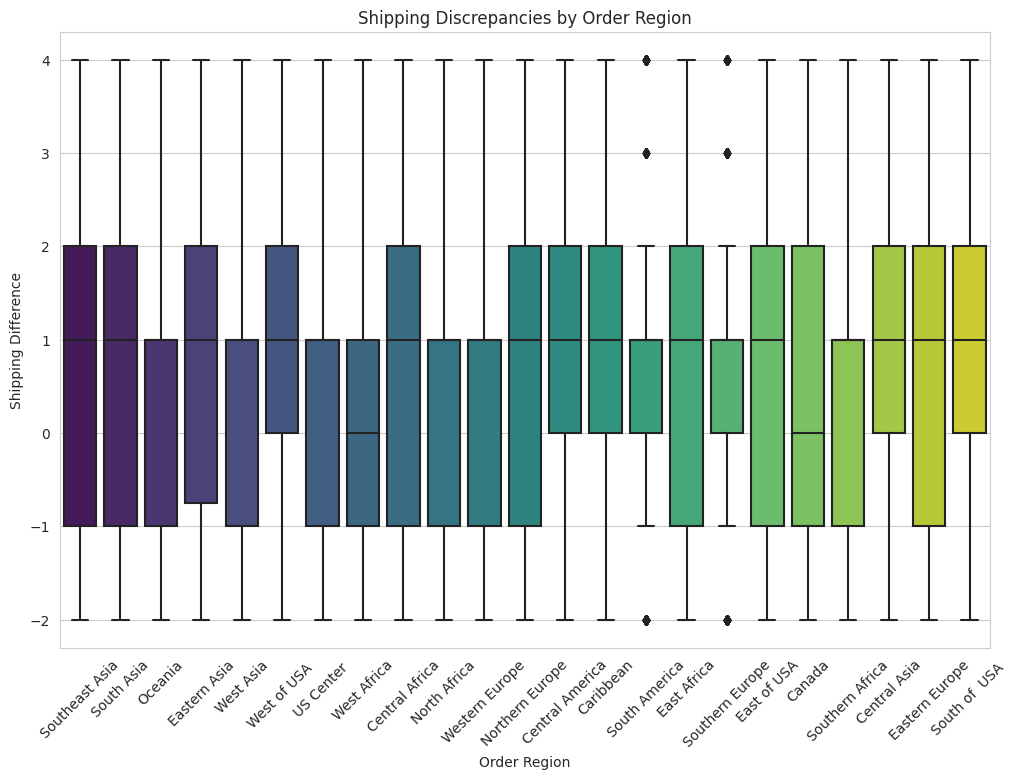

In [ ]:
# Discrepancies by Order Region
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Order Region', y='Shipping Difference', palette='viridis')
plt.title("Shipping Discrepancies by Order Region")
plt.xticks(rotation=45)
plt.show()

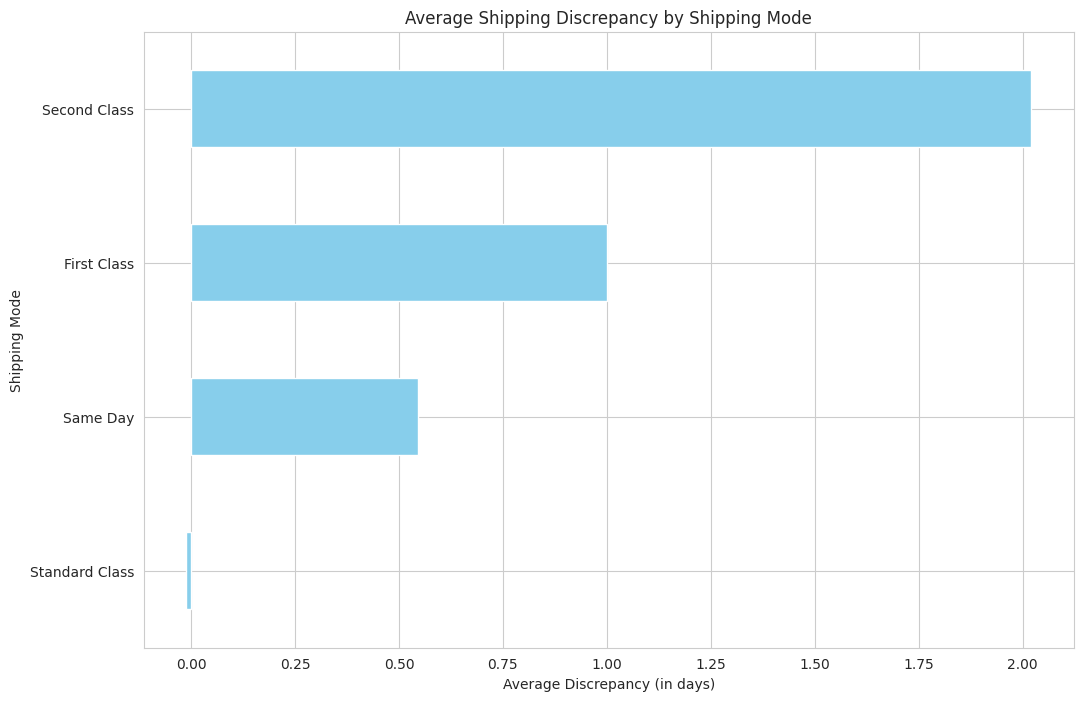

In [ ]:
avg_discrepancy = df.groupby('Shipping Mode')['Shipping Difference'].mean().sort_values()
avg_discrepancy.plot(kind='barh', figsize=(12, 8), color='skyblue')
plt.title("Average Shipping Discrepancy by Shipping Mode")
plt.xlabel("Average Discrepancy (in days)")
plt.show()